# Import thư viện cần thiết

In [133]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#----------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

## Load dữ liệu 

In [134]:
data = pd.read_csv('Data/loan_approval_dataset.csv')

data.head(7)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved


Bộ dữ liệu phê duyệt khoản vay là một tập hợp các hồ sơ tài chính và thông tin liên quan được sử dụng để xác định khả năng đủ điều kiện vay vốn của cá nhân hoặc tổ chức từ một tổ chức cho vay. Dữ liệu này bao gồm nhiều yếu tố như điểm tín dụng (CIBIL score), thu nhập, tình trạng việc làm, thời hạn vay, số tiền vay, giá trị tài sản và trạng thái khoản vay. Bộ dữ liệu này thường được sử dụng trong học máy và phân tích dữ liệu để phát triển các mô hình và thuật toán nhằm dự đoán khả năng được phê duyệt vay dựa trên các đặc trưng đã cho.

In [135]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [136]:
data.describe(include='O')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [137]:
d = data.columns.tolist()
print(d)

['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [138]:
to_remove = ['loan_id', ' no_of_dependents', ' education', ' self_employed',' loan_term', ' cibil_score',' loan_status']
d = [col for col in d if col not in to_remove]
d

[' income_annum',
 ' loan_amount',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value']

### Kiểm tra duplicate

In [139]:
data.duplicated().sum()

0

In [140]:
data = data.drop_duplicates()

### Kiểm tra lỗi cấu trúc

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [142]:
usd_conversion_rate = 83

data["income_annum_usd"] = data[" income_annum"] / usd_conversion_rate
data["loan_amount_usd"] = data[" loan_amount"] / usd_conversion_rate
data["residential_assets_usd"] = data[" residential_assets_value"] / usd_conversion_rate
data["commercial_assets_usd"] = data[" commercial_assets_value"] / usd_conversion_rate
data["luxury_assets_usd"] = data[" luxury_assets_value"] / usd_conversion_rate
data["bank_assets_usd"] = data[" bank_asset_value"] / usd_conversion_rate
data = data.drop(d,axis=1)

In [143]:
data.columns = data.columns.str.strip()

Chuyển đơn vị đồng tiền từ Rupee sang tiền Đô (Dollar)

### Kiểm tra missing 

In [144]:
data.isnull().sum()

loan_id                   0
no_of_dependents          0
education                 0
self_employed             0
loan_term                 0
cibil_score               0
loan_status               0
income_annum_usd          0
loan_amount_usd           0
residential_assets_usd    0
commercial_assets_usd     0
luxury_assets_usd         0
bank_assets_usd           0
dtype: int64

In [146]:
data.dropna()

,loan_id,no_of_dependents,education,self_employed,loan_term,cibil_score,loan_status,income_annum_usd,loan_amount_usd,residential_assets_usd,commercial_assets_usd,luxury_assets_usd,bank_assets_usd
0,1,2,Graduate,No,12,778,Approved,115662.650602,360240.963855,28915.662651,212048.192771,273493.975904,96385.542169
1,2,0,Not Graduate,Yes,8,417,Rejected,49397.590361,146987.951807,32530.120482,26506.024096,106024.096386,39759.036145
2,3,3,Graduate,No,20,506,Rejected,109638.554217,357831.325301,85542.168675,54216.867470,401204.819277,154216.867470
3,4,3,Graduate,No,8,467,Rejected,98795.180723,369879.518072,219277.108434,39759.036145,280722.891566,95180.722892
4,5,5,Not Graduate,Yes,20,382,Rejected,118072.289157,291566.265060,149397.590361,98795.180723,354216.867470,60240.963855
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,12,317,Rejected,12048.192771,27710.843373,33734.939759,6024.096386,39759.036145,9638.554217
4265,4266,0,Not Graduate,Yes,20,559,Approved,39759.036145,136144.578313,50602.409639,34939.759036,132530.120482,22891.566265
4266,4267,2,Not Graduate,No,18,457,Rejected,78313.253012,287951.807229,14457.831325,149397.590361,218072.289157,87951.807229
4267,4268,1,Not Graduate,No,8,780,Approved,49397.590361,154216.867470,98795.180723,8433.734940,169879.518072,69879.518072


### Xử lý Ngoại lệ 

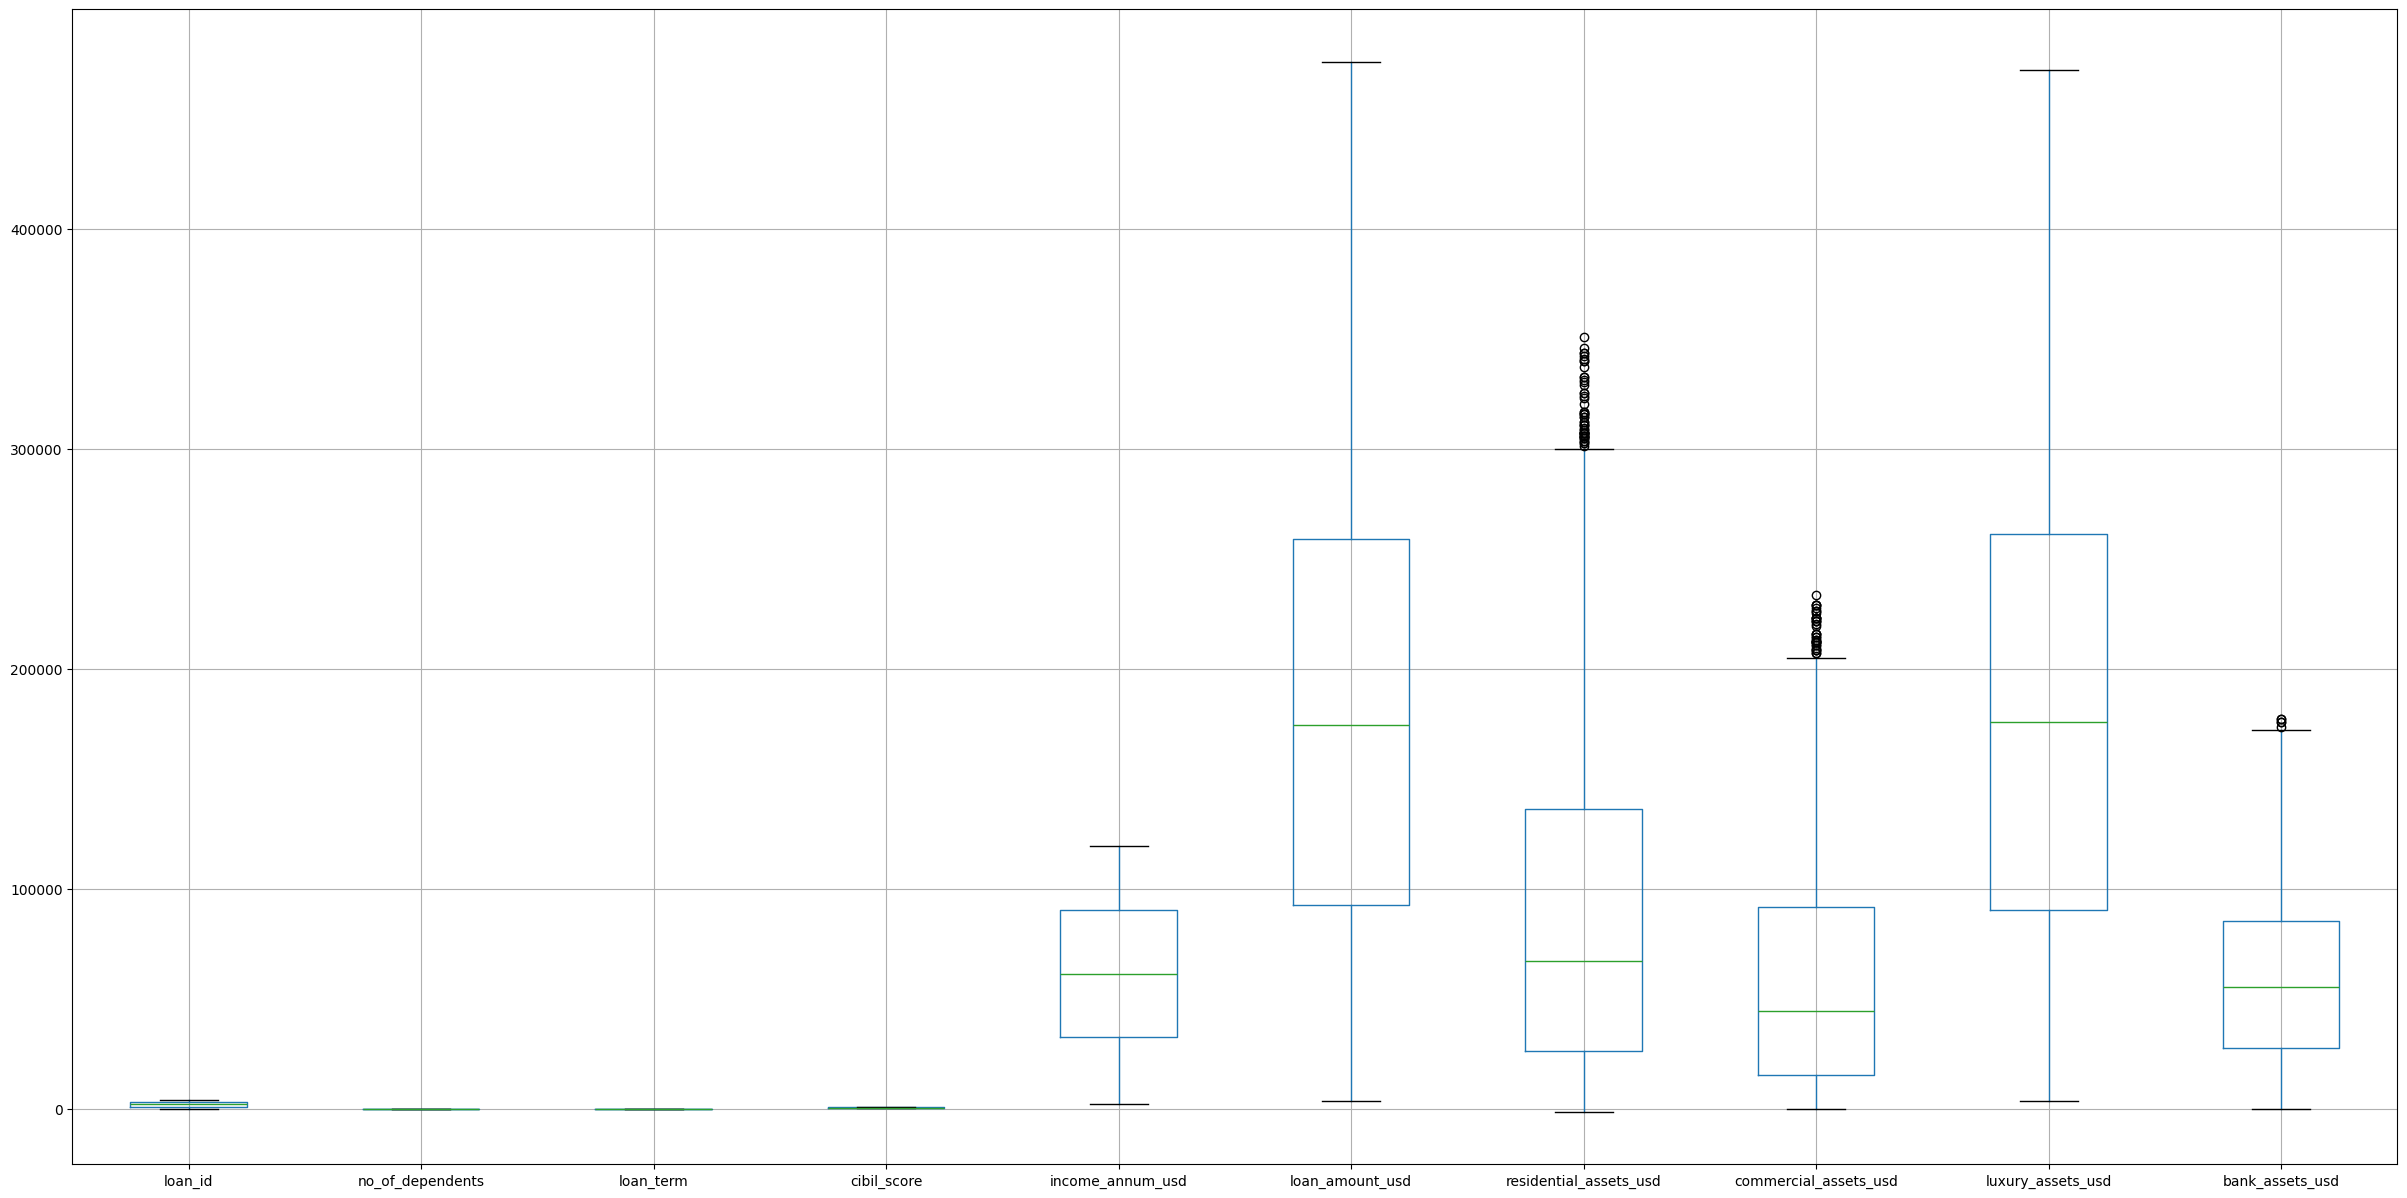

In [147]:
plt.figure(figsize=(30,15))
data.boxplot()
plt.show()

In [150]:
def outlie_processing(your_column):
    Q1 = data[your_column].quantile(0.25)
    Q3 = data[your_column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[your_column] < Q1 - 1.5 * IQR) | (data[your_column] > Q3 + 1.5 * IQR)][your_column]
    print(outliers)

outlie_processing('residential_assets_usd')
outlie_processing('commercial_assets_usd')
outlie_processing('bank_assets_usd')

82      307228.915663
98      312048.192771
123     322891.566265
228     307228.915663
262     308433.734940
693     306024.096386
714     340963.855422
781     316867.469880
892     332530.120482
905     345783.132530
919     304819.277108
924     310843.373494
953     307228.915663
956     304819.277108
987     339759.036145
997     303614.457831
1002    310843.373494
1397    309638.554217
1419    307228.915663
1468    325301.204819
1591    343373.493976
1625    316867.469880
1965    342168.674699
1997    325301.204819
2185    312048.192771
2318    343373.493976
2384    320481.927711
2412    315662.650602
2586    337349.397590
2715    310843.373494
2818    307228.915663
2828    324096.385542
2922    303614.457831
2927    332530.120482
2930    304819.277108
2940    314457.831325
3119    350602.409639
3157    306024.096386
3234    339759.036145
3310    302409.638554
3498    308433.734940
3631    306024.096386
3763    314457.831325
3782    331325.301205
3860    301204.819277
3868    30

Nhận xét : Có thể giữ lại các ngoại lệ vì đây không phải lỗi nhập liệu , chỉ là một số cá nhân có thu nhập cao hơn so với người thường 

## Khai phá dữ liệu 